In [202]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [391]:
class SVMAlgoritm:
  def __init__(self, 
               C: float=1.0,
               lr: float=1e-2,
               num_steps: int=500):
    self.C = C
    self.lr = lr
    self.num_steps = num_steps
    self.weights = None

  def hingeloss_1_1(self, values, targets, weights):
    n = targets.shape[0]
    values = np.ones(n) - targets*np.dot(weights, values.T)
    zeros = np.zeros(values.shape[0]).reshape((values.shape[0], 1))
    values = values.reshape(values.shape[0], 1)
    values = np.concatenate([zeros,values], axis = 1)
    return np.sum(np.amax(values, axis=1))

  def l2_regularization(self, weights):
    return self.C*np.dot(weights,weights)

  def sigmoid(self,x):
    return 1 / (1 + np.exp(-x))
 
  def weights_initialisation(self, nomber_of_weights):
    weights = []
    for weight in range(nomber_of_weights):
      weights.append(random.uniform(0.01,1))
    return np.array(weights)


  def lim_gradient(self,values,targets, weights, delta_w = 0.01):
    range_weights = len(weights)
    derivation_values = []
    for weight in range(range_weights):
      new_weights = weights.copy()
      new_weights[weight] += delta_w
      new_derivation = (self.hingeloss_1_1(values, targets, new_weights) - self.hingeloss_1_1(values, targets, weights) + self.l2_regularization(new_weights) - self.l2_regularization(weights))/delta_w
      derivation_values.append(new_derivation)
    return np.array(derivation_values)    

  def math_weights(self, values,targets):
    margin = targets*np.dot(values, self.weights)
    for i,x in enumerate(values):
        margin = targets[i]*np.dot(self.weights,values[i])
        if margin >= 1: # классифицируем верно
            self.weights = self.weights - self.lr*self.C*self.weights/self.num_steps
        else: # классифицируем неверно или попадаем на полосу разделения при 0<m<1
            self.weights = self.weights +self.lr*(targets[i]*values[i] - self.C*self.weights/self.num_steps)
    return self.weights
  def fit(self, values, target_values):
    self.weights = self.weights_initialisation(values.shape[1] + 1)
    ones = np.ones(values.shape[0]).reshape((values.shape[0], 1))
    values = np.concatenate([ones,values], axis = 1)
    for step in range(self.num_steps):
      # My variant
      self.weights -= self.lr*self.lim_gradient(values, target_values,self.weights) 
      # Internet variant
      #self.math_weights(values, target_values)
    return print('End weights:' , self.weights,)


  def predict(self, values):
    ones = np.ones(values.shape[0]).reshape((values.shape[0], 1))
    values = np.concatenate([ones,values], axis = 1) 
    final_pred = self.sigmoid(np.dot(self.weights,values.T))
    answers = []
    for i in final_pred:
      if i >=0.5:
        answers.append(1)
      else:
        answers.append(-1)
    print(final_pred)
    return np.array(answers)


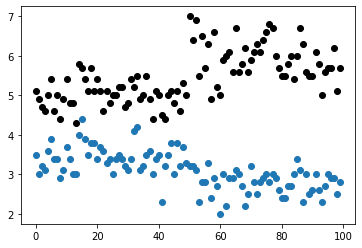

In [392]:
from sklearn.datasets import load_iris
data = load_iris()
values = data.data[:100]
targets = data.target[:100]
targets[targets == 0] = -1

X_train, X_test, y_train, y_test = train_test_split(values, targets, test_size=0.2, random_state=42)

plt.plot(values.T[0],'ko')
plt.plot(values.T[1],'o')

In [396]:
model = SVMAlgoritm()
model.fit(X_train,y_train)

End weights: [-0.13952401 -0.21311113 -0.78743108  1.22137805  0.51873137]


In [397]:
print(model.predict(X_test))
print(y_test)

[0.97110437 0.91961565 0.94683235 0.15986915 0.15570772 0.12262075
 0.06726615 0.8818817  0.0938076  0.10259445 0.10769225 0.17573098
 0.93811795 0.05704542 0.93324166 0.09742614 0.94242413 0.95517257
 0.14642147 0.12696877]
[ 1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1]
[ 1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1]


In [398]:
accuracy = y_test - model.predict(X_test) 
print('accuracy:', 100*len(accuracy[accuracy == 0])/len(accuracy), '%') 

[0.97110437 0.91961565 0.94683235 0.15986915 0.15570772 0.12262075
 0.06726615 0.8818817  0.0938076  0.10259445 0.10769225 0.17573098
 0.93811795 0.05704542 0.93324166 0.09742614 0.94242413 0.95517257
 0.14642147 0.12696877]
accuracy: 100.0 %
